# 카토그램

* https://h3geo.org/docs/highlights/aggregation/
* https://h3geo.org/docs/core-library/restable/
* https://developers.kakao.com/docs/latest/ko/local/dev-guide

In [1]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/data/crime.xlsx')
df

dt        lat       long
0       2016-09-30  40.837376 -73.887761
1       2016-09-30  40.661205 -73.950687
2       2016-09-30  40.816872 -73.850685
3       2016-09-30  40.696177 -73.804492
4       2016-09-30  40.741458 -73.884339
...            ...        ...        ...
353202  2016-11-26  40.853241 -73.853654
353203  2016-11-21  40.832747 -73.940770
353204  2016-09-03  40.651416 -73.840882
353205  2016-07-05  40.698159 -73.795085
353206  2016-07-01  40.565826 -74.130120

[353207 rows x 3 columns]

In [2]:
df.dropna(inplace=True)
df

dt        lat       long
0       2016-09-30  40.837376 -73.887761
1       2016-09-30  40.661205 -73.950687
2       2016-09-30  40.816872 -73.850685
3       2016-09-30  40.696177 -73.804492
4       2016-09-30  40.741458 -73.884339
...            ...        ...        ...
353202  2016-11-26  40.853241 -73.853654
353203  2016-11-21  40.832747 -73.940770
353204  2016-09-03  40.651416 -73.840882
353205  2016-07-05  40.698159 -73.795085
353206  2016-07-01  40.565826 -74.130120

[353207 rows x 3 columns]

In [3]:
pip install h3

In [4]:
pip install geopandas

In [5]:
pip install geojson

In [9]:
import h3
import folium
import geopandas as gpd
import plotly.express as px

from shapely.geometry import Point, Polygon
from geojson import Feature, FeatureCollection
from geopy.distance import distance

In [7]:
df.head()

dt        lat       long
0  2016-09-30  40.837376 -73.887761
1  2016-09-30  40.661205 -73.950687
2  2016-09-30  40.816872 -73.850685
3  2016-09-30  40.696177 -73.804492
4  2016-09-30  40.741458 -73.884339

In [10]:
lv6 = h3.geo_to_h3(float(df['lat'][0]), float(df['long'][0]), 13)
geo_df = gpd.GeoDataFrame({'h3': [lv6]})

In [11]:
geo_df

h3
0  8d2a100ad01023f

In [12]:
# 좌표로 cell id를 얻음
def geo_to_h3(lat, lng, resolution):
    return h3.geo_to_h3(lat, lng, resolution)

# cell id로 육각형 좌표를 얻음
def add_geometry(row):
    points = h3.h3_to_geo_boundary(row['cell_id'], True)
    return Polygon(points)

# 좌표, 범죄 수 등등의 정보를 jeojson 포맷으로 변경
def hexagons_dataframe_to_geojson(df_hex, hex_id_field, geometry_field, value_field, file_output = None):
    list_features = []

    for i, row in df_hex.iterrows():
        feature = Feature(geometry = row[geometry_field],
                          id = row[hex_id_field],
                          properties = {"value": row[value_field]})
        list_features.append(feature)

    feat_collection = FeatureCollection(list_features)

    if file_output is not None:
        with open(file_output, "w") as f:
            json.dump(feat_collection, f)

    else :
        return feat_collection

In [13]:
df.tail(5)

dt        lat       long
353202  2016-11-26  40.853241 -73.853654
353203  2016-11-21  40.832747 -73.940770
353204  2016-09-03  40.651416 -73.840882
353205  2016-07-05  40.698159 -73.795085
353206  2016-07-01  40.565826 -74.130120

In [14]:
a = range(0, 353207)
b = range(0, 353207)

# 좌표와 resolution으로 육각형 cell ID를 맵핑
list_ = list(map(lambda x, y: geo_to_h3(float(df['lat'][x]), float(df['long'][y]), 10), a, b))

In [15]:
list_

['8a2a100ad017fff',
 '8a2a100db22ffff',
 '8a2a10018787fff',
 '8a2a100e9587fff',
 '8a2a100c6b5ffff',
 '8a2a100cbd97fff',
 '8a2a1001398ffff',
 '8a2a100ab657fff',
 '8a2a100aaa97fff',
 '8a2a1001a99ffff',
 '8a2a10773a5ffff',
 '8a2a100f124ffff',
 '8a2a100d6457fff',
 '8a2a100d3617fff',
 '8a2a100d36affff',
 '8a2a10771797fff',
 '8a2a1062a727fff',
 '8a2a100ca6d7fff',
 '8a2a100a86effff',
 '8a2a100f2d5ffff',
 '8a2a1005a4f7fff',
 '8a2a10774117fff',
 '8a2a100d9577fff',
 '8a2a100e40a7fff',
 '8a2a10740617fff',
 '8a2a1008914ffff',
 '8a2a100a9d2ffff',
 '8a2a1008c81ffff',
 '8a2a100ac577fff',
 '8a2a100c6127fff',
 '8a2a100a1baffff',
 '8a2a100ca6d7fff',
 '8a2a100de127fff',
 '8a2a100e9037fff',
 '8a2a100acc37fff',
 '8a2a100122affff',
 '8a2a100154affff',
 '8a2a100d8ca7fff',
 '8a2a10622c5ffff',
 '8a2a10752887fff',
 '8a2a100aba8ffff',
 '8a2a1008cb0ffff',
 '8a2a100c854ffff',
 '8a2a100f2677fff',
 '8a2a10762d4ffff',
 '8a2a100da5a7fff',
 '8a2a100d8887fff',
 '8a2a10725baffff',
 '8a2a100e269ffff',
 '8a2a1076291ffff',


In [16]:
cell_df = pd.DataFrame(list_, columns=['cell_id'])
cell_df.head()

cell_id
0  8a2a100ad017fff
1  8a2a100db22ffff
2  8a2a10018787fff
3  8a2a100e9587fff
4  8a2a100c6b5ffff

In [17]:
df = pd.concat([df, cell_df], axis=1)

In [18]:
df.head()

dt        lat       long          cell_id
0  2016-09-30  40.837376 -73.887761  8a2a100ad017fff
1  2016-09-30  40.661205 -73.950687  8a2a100db22ffff
2  2016-09-30  40.816872 -73.850685  8a2a10018787fff
3  2016-09-30  40.696177 -73.804492  8a2a100e9587fff
4  2016-09-30  40.741458 -73.884339  8a2a100c6b5ffff

In [20]:
df.groupby('cell_id').size()

cell_id
8a2a100002d7fff     1
8a2a1000044ffff     5
8a2a10000607fff     2
8a2a10000627fff     8
8a2a1000062ffff    11
                   ..
8a2a10776d57fff     1
8a2a10776d67fff     3
8a2a10776d6ffff     4
8a2a10776d77fff     5
8a2a10776da7fff     1
Length: 30410, dtype: int64

In [21]:
h3_df = df.groupby('cell_id').size().reset_index()

In [22]:
h3_df.head()

cell_id   0
0  8a2a100002d7fff   1
1  8a2a1000044ffff   5
2  8a2a10000607fff   2
3  8a2a10000627fff   8
4  8a2a1000062ffff  11

In [23]:
h3_df.columns = ['cell_id', 'crime_cnt']

In [24]:
h3_df.head()

cell_id  crime_cnt
0  8a2a100002d7fff          1
1  8a2a1000044ffff          5
2  8a2a10000607fff          2
3  8a2a10000627fff          8
4  8a2a1000062ffff         11

In [25]:
h3_df.sort_values(by='crime_cnt', ascending=False)

cell_id  crime_cnt
20091  8a2a103b4c77fff       1283
18863  8a2a100f42f7fff       1254
11929  8a2a100d2c27fff        880
6225   8a2a100a819ffff        560
8161   8a2a100c0907fff        539
...                ...        ...
20356  8a2a103b668ffff          1
20353  8a2a103b665ffff          1
20348  8a2a103b6627fff          1
20338  8a2a103b6577fff          1
30409  8a2a10776da7fff          1

[30410 rows x 2 columns]

In [26]:
h3_df['geometry'] = (h3_df.apply(add_geometry,axis=1))

In [27]:
h3_df

cell_id  ...                                           geometry
0      8a2a100002d7fff  ...  POLYGON ((-73.78281844255476 40.84881500202084...
1      8a2a1000044ffff  ...  POLYGON ((-73.78986930601478 40.85771155505049...
2      8a2a10000607fff  ...  POLYGON ((-73.7900297495666 40.85354819463511,...
3      8a2a10000627fff  ...  POLYGON ((-73.78883187883997 40.85433468694925...
4      8a2a1000062ffff  ...  POLYGON ((-73.78848610316759 40.85320909435997...
...                ...  ...                                                ...
30405  8a2a10776d57fff  ...  POLYGON ((-74.01397814369939 40.6761685708598,...
30406  8a2a10776d67fff  ...  POLYGON ((-74.01124860052775 40.67662046815143...
30407  8a2a10776d6ffff  ...  POLYGON ((-74.01089875465922 40.67549796588705...
30408  8a2a10776d77fff  ...  POLYGON ((-74.01278832283833 40.67695578075374...
30409  8a2a10776da7fff  ...  POLYGON ((-74.01775765408672 40.67908412722002...

[30410 rows x 3 columns]

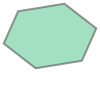

In [28]:
h3_df['geometry'][0]

In [29]:
# 좌표, 범죄 수 등등의 정보
geojson_obj = (hexagons_dataframe_to_geojson
                (h3_df,
                 hex_id_field='cell_id',
                 value_field='crime_cnt',
                 geometry_field='geometry'))

In [30]:
geojson_obj

Output hidden; open in https://colab.research.google.com to view.

In [32]:
fig = (
    px.choropleth_mapbox
       (
        h3_df, 
        geojson=geojson_obj, # 좌표, 범죄 수 등등의 정보
        locations='cell_id', # 위치는 어떻게 나타낼 것인가
        color='crime_cnt', # 컬러 시각화를 나타내고 싶은 데이터
        color_continuous_scale="matter", # 컬러 변화 Range를 어떻게 줄 것인가
        range_color=(0,h3_df['crime_cnt'].mean()), # 컬러 range를 변화줄 수 있음 (mean, min, max, median)
        mapbox_style='open-street-map', # 지도 스타일
        zoom=12, # 지도 zoom
        center = {"lat":40.837376, "lon": -73.887761}, # 지도의 중심
        opacity=0.6, # 투명도 조절
        labels={'crime_cnt':'# '} # 범죄 수를 어떻게 보여줄 것인가
        )
       )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()